# Challenge Solaire

## Imports

In [96]:
import pandas as pd
import wget as wg
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt


## Telechargement des données

In [ ]:
url = "https://gml.noaa.gov/aftp/data/radiation/surfrad/Boulder_CO/"
years = ["2019", "2020", "2021", "2022"]
days = [f'{i:03d}' for i in range(1, 366)]
for year in years:
    for day in days:
        try :
            wg.download(f"https://gml.noaa.gov/aftp/data/radiation/surfrad/Boulder_CO/{year}/tbl{year[2:]}{day}.dat")
        except Exception as e :
            print(e)

## Construire des données propres

In [81]:
def convert(x: str) -> float:
    [value, indicator] = x.split(" ")
    if indicator == "1":
        return np.nan
    else: 
        return float(value)
    
def convert_to_nan(x: str) -> float:
    if x:
        return np.nan
    else:
        return float(x)
def get_time(df :pd.DataFrame) -> pd.Series:
    return

In [82]:
def convert_date(year, year_day, month, day, hour, minute):
    return datetime.datetime(year, month, day, hour, minute)

In [83]:
col_names = [ "Date", "zen", "dw_solar", "uw_solar", "direct_n", "diffuse", "dw_ir", "dw_casetemp", "dw_dometemp", "uw_ir", "uw_casetemp", "uw_dometemp", "uvb", "par", "netsolar", "netir", "totalnet", "temp", "rh", "windspd", "winddir", "pressure"]


In [84]:
def get_clean_df(path: str):
    df = pd.read_csv(path, skiprows=2, delim_whitespace=True)     
    columns = [pd.Series([tuple(df.iloc[i, 0:6].map(lambda x : int(x))) for i in range(len(df))]).map(lambda x : convert_date(*x)), df.iloc[:,7]]
    for i in range(8, len(df.columns), 2):
        columns.append(df.iloc[:,i] + df.iloc[:,i+1].map(convert_to_nan))
    df_final = pd.concat(tuple(columns), axis=1 )
    df_final.columns = col_names
    df_final.set_index("Date", inplace=True)
    df_final.dropna(how="any", inplace=True)
    print(path)
    return df_final

In [87]:
path = r"C:\Users\XAVIER\Documents\Data Sophia\Challenge_Solaire"
files = [ el for el in os.listdir(path) if el.split(".")[-1] == "dat"]
df = pd.concat([get_clean_df(f"{path}\\{el}")for el in files])
    

ValueError: No objects to concatenate

In [86]:
df_final = df.dropna(how="any")
df_final = df_final.resample("3600S").mean()
df_final.index = df_final.index.map(lambda x : x - datetime.timedelta(0, 3600, 0))
df_final.to_csv("cleaned_data.csv")


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

## Analyse de données

mettre des plots et des scatters

In [88]:
df_cleaned = pd.read_csv("cleaned_data.csv")
df_cleaned["Date"] = df_cleaned["Date"].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
df_cleaned.set_index("Date", inplace=True)
df_cleaned

,zen,dw_solar,uw_solar,direct_n,diffuse,dw_ir,dw_casetemp,dw_dometemp,uw_ir,uw_casetemp,...,uvb,par,netsolar,netir,totalnet,temp,rh,windspd,winddir,pressure
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 21:00:00,77.302778,191.377778,112.727778,708.177778,54.772222,177.633333,262.863333,262.321111,255.705556,263.842222,...,7.088889,95.744444,97.888889,-78.061111,19.833333,-12.594444,68.200000,1.055556,171.094444,828.511111
2019-01-01 22:00:00,90.156452,5.903226,3.051613,0.312903,6.316129,177.345161,260.598065,260.128387,229.083871,260.401935,...,0.309677,3.270968,3.264516,-51.748387,-48.487097,-14.277419,76.680645,1.464516,228.403226,828.829032
2019-01-01 23:00:00,98.297797,-0.259322,-0.781356,0.749153,0.083051,177.813559,258.309153,257.926610,227.735593,258.814915,...,0.000000,0.213559,0.083051,-49.920339,-49.837288,-16.298305,78.096610,2.223729,259.755932,828.674576
2019-01-02 00:00:00,109.042167,-1.765000,-0.915000,0.413333,0.000000,179.010000,258.119333,257.945500,225.331667,258.267333,...,0.000000,0.200000,0.000000,-46.318333,-46.318333,-15.588333,77.095000,1.236667,271.798333,829.070000
2019-01-02 01:00:00,120.309833,-0.738333,-1.053333,0.365000,0.000000,179.123333,258.309500,257.972667,226.948333,258.168500,...,0.000000,0.200000,0.000000,-47.831667,-47.831667,-16.530000,78.033333,1.891667,296.478333,829.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11 10:00:00,103.696000,-1.420000,-0.971667,0.008333,0.000000,258.553333,279.427167,279.246167,339.015000,279.887833,...,0.000000,0.400000,0.000000,-80.466667,-80.466667,5.348333,86.523333,1.478333,290.255000,838.803333
2022-09-11 11:00:00,91.746739,4.454348,1.971739,76.069565,6.113043,257.515217,280.283478,280.070652,337.543478,279.669130,...,0.293478,4.893478,6.545652,-80.032609,-73.484783,6.267391,88.993478,0.934783,257.056522,838.950000
2022-09-11 12:00:00,81.029667,115.086667,31.073333,565.463333,35.511667,258.968333,281.810833,281.599333,354.326667,280.679333,...,4.923333,64.043333,98.781667,-95.351667,3.430000,8.608333,87.241667,1.348333,239.675000,839.111667


## Ecart au solaire

In [89]:
df_mcclear = pd.read_csv("mcclear.csv", skiprows=37, encoding="utf8", sep=";")
df_mcclear["Observation period"] = df_mcclear["Observation period"].map(lambda x : datetime.datetime.strptime(x.split("/")[-1], "%Y-%m-%dT%H:%M:%S.%f"))
df_mcclear.set_index("Observation period", inplace=True)
df_mcclear.head(30)

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI
Observation period,,,,,
2019-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 05:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 06:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 07:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 08:00:00,0.0000,0.0000,0.0000,0.0000,0.0000
2019-01-01 09:00:00,0.0000,0.0000,0.0000,0.0000,0.0000


In [90]:
#df_mcclear[df_cleaned.index[0]]
df_mcclear.index[21], df_cleaned.index[0]

(Timestamp('2019-01-01 22:00:00'), Timestamp('2019-01-01 21:00:00'))

2019-01-01 21:00:00    566.2903
2019-01-01 22:00:00    441.8709
2019-01-01 23:00:00    263.2381
2019-01-02 00:00:00     54.8955
2019-01-02 01:00:00      0.0000
                         ...   
2022-01-01 13:00:00      0.0000
2022-01-01 14:00:00      0.0000
2022-01-01 22:00:00    442.5840
2022-01-01 23:00:00    264.0117
2022-01-02 00:00:00     55.4714
Name: TOA, Length: 24881, dtype: float64


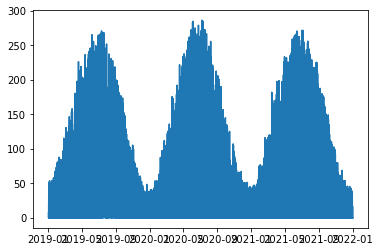

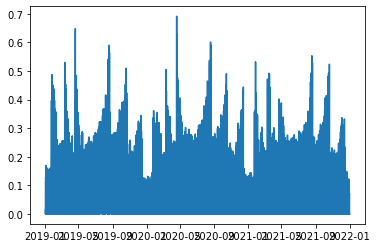

In [121]:
df_global = pd.concat([df_cleaned, df_mcclear], axis=1).dropna(how="any")
print(df_global['TOA'])
df_global = df_global[df_global['TOA'] >= 50]
df_global['cor_uvb'] = df_global['uvb']/df_global['TOA']
plt.plot(df_global['uvb'])
plt.show()
plt.plot(df_global['cor_uvb'])
plt.show()

## Création de jeu de tests

## Prédiction

## Conclusion